In [1]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
dfall <- read.csv('https://raw.githubusercontent.com/RWorkshop/Statistics-With-R-Workshop/master/data/socrHW.csv')

df <- sample_frac(dfall,0.3)

In [3]:
# Calculate Mahalanobis Distance with height and weight distributions
m_dist <- mahalanobis(df[, 1:2], colMeans(df[, 1:2]), cov(df[, 1:2]))
df$m_dist <- round(m_dist, 2)

# Mahalanobis Outliers - Threshold set to 12
df$outlier_maha <- "No"
df$outlier_maha[df$m_dist > 12] <- "Yes"



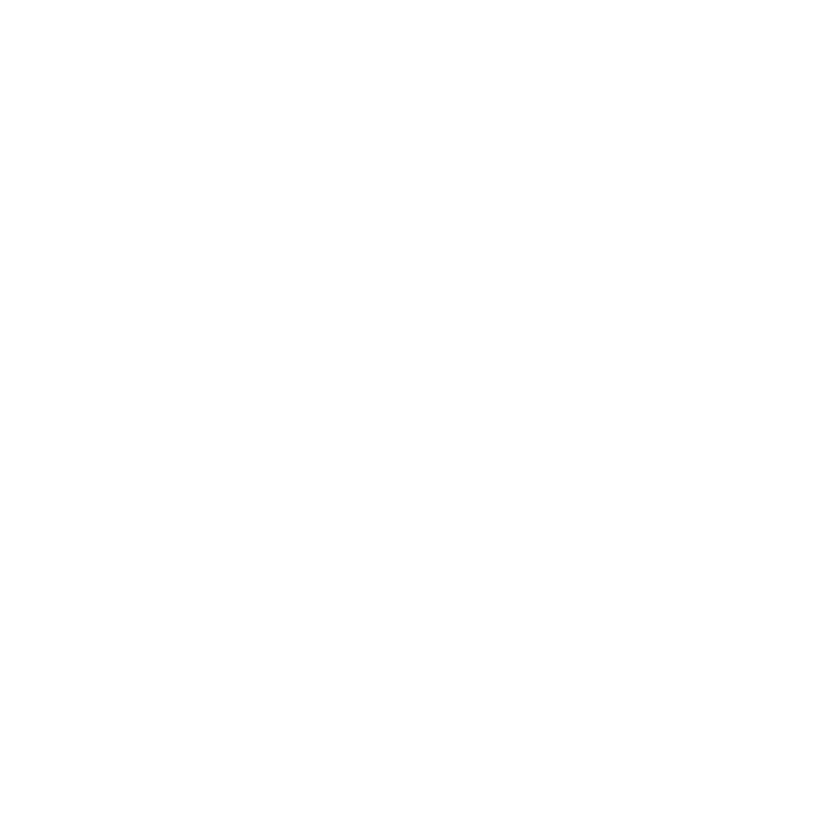

In [4]:
ggplot(df, aes(x = weight, y = height, color = outlier_maha)) +
      geom_point(size = 5, alpha = 0.6)

In [5]:
# Scatterplot with Maha Outliers
p<- ggplot(df, aes(x = weight, y = height, color = outlier_maha)) +
      geom_point(size = 5, alpha = 0.6) +
      labs(title = "Weight vs Height",
           subtitle = "Outlier Detection in weight vs height data - Using Mahalanobis Distances",
           caption = "Source: http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights") +
      ylab("Height in cm") + xlab("Weight in kg") +
      scale_y_continuous(breaks = seq(160, 200, 5)) +
      scale_x_continuous(breaks = seq(35, 80, 5))